<a href="https://colab.research.google.com/github/aashika1110/Deeploy_Assignment1/blob/master/Assignment3/Question4Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Install necessary libraries
!pip install tensorflow
!pip install tf-keras-vis
!pip install ipython
!pip install matplotlib
!pip install tf-explain


In [8]:
# Import libraries
import tensorflow as tf
from tf_explain.core.grad_cam import GradCAM
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Image path and index
IMAGE_PATHS = ['car.jpg']  # Provide the path to your image here
indices = [0]  # We want to pass the first index of the image list

# Load VGG16 model
model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)


In [10]:
# Function to display images in Jupyter notebook
def display_images(paths):
    for path in paths:
        display(Image(filename=path))


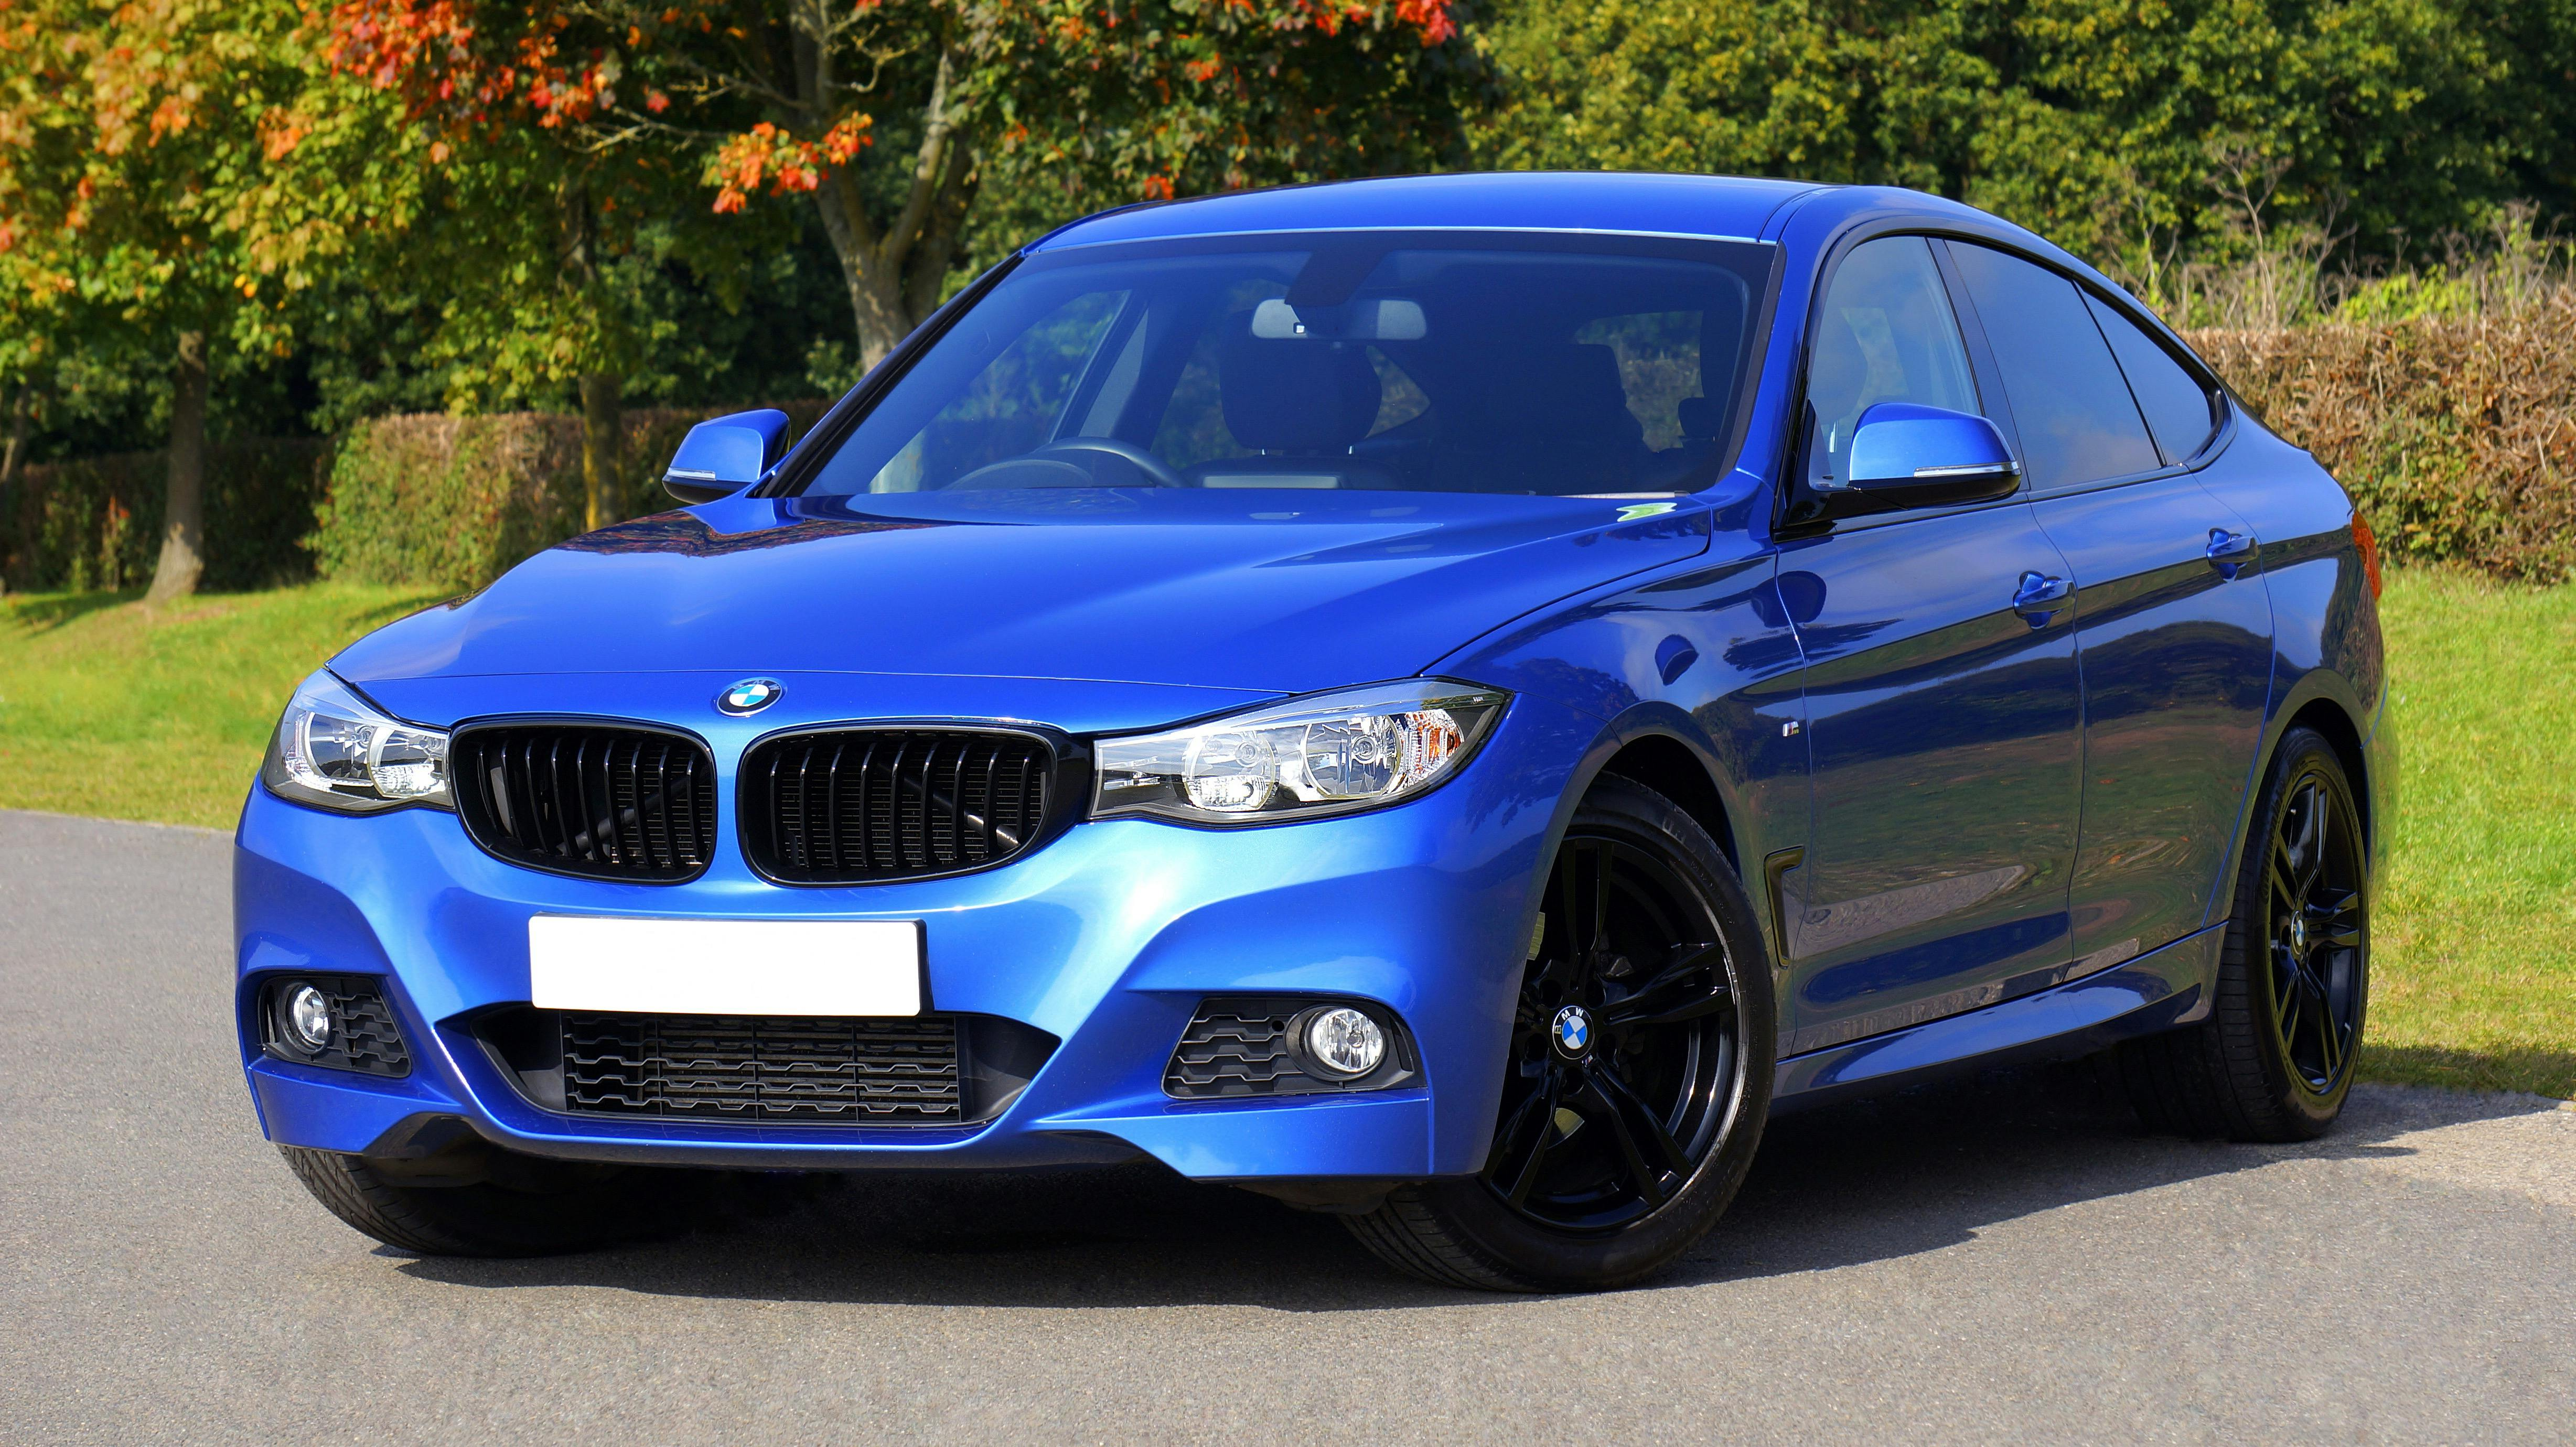

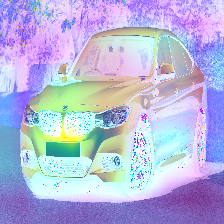

In [11]:
# Grad-CAM Visualization
for i in range(len(IMAGE_PATHS)):
    each_path = IMAGE_PATHS[i]
    #index = indices[i]

    # Load the image and prepare it for prediction
    img = tf.keras.preprocessing.image.load_img(each_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Define the GradCAM explainer
    explainer = GradCAM()

    # Compute GradCAM
    grid = explainer.explain((img, None), model, layer_name='block5_conv3', class_index=indices[i])  # 'block5_conv3' is the last convolutional layer

    # Save the Grad-CAM result
    name = each_path.split("/")[-1].split(".")[0]  # Extract the name of the image
    explainer.save(grid, '.', name + '_grad_cam.png')

    # Display the original image and GradCAM result
    display_images([each_path, name + '_grad_cam.png'])
